In [1]:
# Importing required packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### DataFrame & Series
`DataFrames` & `Series` can be thought of as dictionaries associating keys to lists of values

In [2]:
# Create data dictionary
data = {'Id': [1001, 1002, 1003, 1004, 1005], 'Name': ['John', 'Tom', 'Harry', 'Tim', 'Bill']}
data

{'Id': [1001, 1002, 1003, 1004, 1005],
 'Name': ['John', 'Tom', 'Harry', 'Tim', 'Bill']}

A `series` corresponds to just a single list of values

In [3]:
series = pd.Series(data['Id'])
series

0    1001
1    1002
2    1003
3    1004
4    1005
dtype: int64

Whereas `DataFrame` has multiple `series`

In [4]:
df = pd.DataFrame(data)
df

,Id,Name
0,1001,John
1,1002,Tom
2,1003,Harry
3,1004,Tim
4,1005,Bill


Each series can have it's own datatype `dtype`

In [5]:
df.dtypes

Id       int64
Name    object
dtype: object

To retrieve the underlying `series` we just need to `subset DataFrame by column name`

In [6]:
df['Name']

0     John
1      Tom
2    Harry
3      Tim
4     Bill
Name: Name, dtype: object

In [7]:
# Retrieve underlying series
type(df['Name'])

pandas.core.series.Series

Both `columns` and `index` values have types and possible names

In [8]:
df.columns

Index(['Id', 'Name'], dtype='object')

In [9]:
df.index

RangeIndex(start=0, stop=5, step=1)

To check `shape` and `dimensions` of the DataFrame

In [10]:
# (Row, Column)
df.shape

(5, 2)

In [11]:
df.ndim

2

To `rename` index and column names

In [12]:
df.index = ['row_' + str(index) for index in range(len(df))]
df.columns = ['ID', 'NAME']
df

,ID,NAME
row_0,1001,John
row_1,1002,Tom
row_2,1003,Harry
row_3,1004,Tim
row_4,1005,Bill


#### Subsetting

To access top/bottom `N` number of values,

In [13]:
# Top 2 rows
df.head(2)

,ID,NAME
row_0,1001,John
row_1,1002,Tom


In [14]:
# Last 2 rows
df.tail(2)

,ID,NAME
row_3,1004,Tim
row_4,1005,Bill


Individual `rows` can be `indexed` by `name`,

In [15]:
df.loc['row_2']

ID       1003
NAME    Harry
Name: row_2, dtype: object

Or by `position`

In [16]:
df.iloc[2]

ID       1003
NAME    Harry
Name: row_2, dtype: object

Rows behave as named tuple, so we can access individual elements by position,

In [17]:
df.iloc[2, 0]

1003

Or by `name`

In [18]:
df.iloc[2].ID

1003

We can use ranges with `iloc`

In [19]:
df.iloc[1:3]

,ID,NAME
row_1,1002,Tom
row_2,1003,Harry


**Note:** One impotant diffrence is that `loc` automatically includes the last value of the range, while `iloc` does not

In [20]:
df.loc['row_1': 'row_3']

,ID,NAME
row_1,1002,Tom
row_2,1003,Harry
row_3,1004,Tim


Since each column is just a numpy array, we can easily manipulate the values and create new columns

In [21]:
df['ID_NEW'] = df.ID + 200
df

,ID,NAME,ID_NEW
row_0,1001,John,1201
row_1,1002,Tom,1202
row_2,1003,Harry,1203
row_3,1004,Tim,1204
row_4,1005,Bill,1205


To `append` new row to DataFrame

In [22]:
df.append({'ID': 1006, 'NAME': 'Kate', 'ID_NEW': 1206}, ignore_index=True)

,ID,NAME,ID_NEW
0,1001,John,1201
1,1002,Tom,1202
2,1003,Harry,1203
3,1004,Tim,1204
4,1005,Bill,1205
5,1006,Kate,1206


**Note:** `append` returns the modified version of the DataFrame so we should assign it to a new variable if we wish to keep the changes

In [23]:
df = df.append({'ID': 1006, 'NAME': 'Kate', 'ID_NEW': 1206}, ignore_index=True)
df

,ID,NAME,ID_NEW
0,1001,John,1201
1,1002,Tom,1202
2,1003,Harry,1203
3,1004,Tim,1204
4,1005,Bill,1205
5,1006,Kate,1206


To `stack` two DataFrames on top of one another, we use `concat`,

In [24]:
# Create new dataframe
df_new = pd.DataFrame({'ID': [2001, 2002, 2003, 2004, 2005, 2006], 
                       'NAME': ['Jack', 'Jill', 'Roni', 'Hunny', 'Sunny', 'Mani'], 
                       'ID_NEW': [2201, 2202, 2203, 2204, 2205, 2206]})
df_new

,ID,NAME,ID_NEW
0,2001,Jack,2201
1,2002,Jill,2202
2,2003,Roni,2203
3,2004,Hunny,2204
4,2005,Sunny,2205
5,2006,Mani,2206


In [25]:
# Concat DataFrames
df_top = pd.concat([df, df_new])
df_top

,ID,NAME,ID_NEW
0,1001,John,1201
1,1002,Tom,1202
2,1003,Harry,1203
3,1004,Tim,1204
4,1005,Bill,1205
5,1006,Kate,1206
0,2001,Jack,2201
1,2002,Jill,2202
2,2003,Roni,2203
3,2004,Hunny,2204


Here `index` will not auto adjust, we need to fix it,

In [26]:
# Reset index and dropping "index" column
df_top = df_top.reset_index()
df_top.drop(columns=['index'], axis=1, inplace=True)
df_top

,ID,NAME,ID_NEW
0,1001,John,1201
1,1002,Tom,1202
2,1003,Harry,1203
3,1004,Tim,1204
4,1005,Bill,1205
5,1006,Kate,1206
6,2001,Jack,2201
7,2002,Jill,2202
8,2003,Roni,2203
9,2004,Hunny,2204


`concat` can also be used to place two DataFrames side by side,

In [27]:
# Concat DataFrames
df_side = pd.concat([df, df_new], axis=1)
df_side

,ID,NAME,ID_NEW,ID,NAME,ID_NEW
0,1001,John,1201,2001,Jack,2201
1,1002,Tom,1202,2002,Jill,2202
2,1003,Harry,1203,2003,Roni,2203
3,1004,Tim,1204,2004,Hunny,2204
4,1005,Bill,1205,2005,Sunny,2205
5,1006,Kate,1206,2006,Mani,2206


### DataFrame Manipulations

Create data with some dummy data

In [28]:
temp_df = pd.DataFrame({'A': range(5), 'B': range(1,6)})
temp_df

,A,B
0,0,1
1,1,2
2,2,3
3,3,4
4,4,5


`map` function allows us to easily apply a function to the rows of a series

In [29]:
temp_df['A'] = temp_df['A'].map(lambda x: x + 5)
temp_df

,A,B
0,5,1
1,6,2
2,7,3
3,8,4
4,9,5


For a DataFrame we need to use `transform`

In [30]:
# Apply to all the columns
temp_df = temp_df.transform(lambda x: x + 9)
temp_df

,A,B
0,14,10
1,15,11
2,16,12
3,17,13
4,18,14


Or we can use `apply` function

In [31]:
# sum(A), sum(B)
temp_df.apply(np.sum, axis=0)

A    80
B    60
dtype: int64

In [32]:
# sum(A + B) -> 0th row, ..., till last row
temp_df.apply(np.sum, axis=1)

0    24
1    26
2    28
3    30
4    32
dtype: int64

### Time Series
Apple stock information from https://finance.yahoo.com/quote/AAPL/history

In [33]:
# Load apple stock data
data = pd.read_csv('AAPL.csv')
data.shape

(5570, 7)

In [34]:
# View top 5 rows
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,0.936384,1.004464,0.907924,0.999442,0.855796,535796800
1,2000-01-04,0.966518,0.987723,0.903460,0.915179,0.783644,512377600
2,2000-01-05,0.926339,0.987165,0.919643,0.928571,0.795111,778321600
3,2000-01-06,0.947545,0.955357,0.848214,0.848214,0.726304,767972800
4,2000-01-07,0.861607,0.901786,0.852679,0.888393,0.760708,460734400


The data contains a column with dates, as well as several columns with various metrics of the stock price fluctuation for each day.

Check type of `Date` column

In [35]:
type(data.Date[0])

str

We can automatically convert the `Date` column to datetime column,

In [36]:
data['Date'] = pd.to_datetime(data['Date'].astype(str))
data.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

We can parse date while loading csv as well,

In [37]:
df = pd.read_csv('AAPL.csv', parse_dates=['Date'])
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

If we set the `Date` column to be index, we can effictively create `Time Series`

In [38]:
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,0.936384,1.004464,0.907924,0.999442,0.855796,535796800
2000-01-04,0.966518,0.987723,0.903460,0.915179,0.783644,512377600
2000-01-05,0.926339,0.987165,0.919643,0.928571,0.795111,778321600
2000-01-06,0.947545,0.955357,0.848214,0.848214,0.726304,767972800
2000-01-07,0.861607,0.901786,0.852679,0.888393,0.760708,460734400


In [39]:
# let's see the info
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5570 entries, 2000-01-03 to 2022-02-18
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5570 non-null   float64
 1   High       5570 non-null   float64
 2   Low        5570 non-null   float64
 3   Close      5570 non-null   float64
 4   Adj Close  5570 non-null   float64
 5   Volume     5570 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 304.6 KB


As we can see pandas automatically generate a `DatetimeIndex` object that allow us to take advantage of the fact that we are dealing with dates.

Now we can easily access parts of the date object,

In [40]:
# Get months
df.index.month

Int64Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            ...
            2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
           dtype='int64', name='Date', length=5570)

In [41]:
# Get years
df.index.year

Int64Index([2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000,
            ...
            2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022],
           dtype='int64', name='Date', length=5570)

In [42]:
# Get days
df.index.day

Int64Index([ 3,  4,  5,  6,  7, 10, 11, 12, 13, 14,
            ...
             7,  8,  9, 10, 11, 14, 15, 16, 17, 18],
           dtype='int64', name='Date', length=5570)

We can `slice` the DataFrame by date

In [43]:
df.loc['2012': '2012-05-28']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.575914,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.643499,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.783868,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.917506,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.897018,394024400
...,...,...,...,...,...,...
2012-05-21,19.089287,20.055000,19.073214,20.045713,17.164627,631106000
2012-05-22,20.341070,20.495714,19.735001,19.891787,17.032820,694870400
2012-05-23,19.910713,20.457144,19.758215,20.377144,17.448423,584897600


In [44]:
# Create new column "Year"
df['Year'] = df.index.year
df.head()

,Open,High,Low,Close,Adj Close,Volume,Year
Date,,,,,,,
2000-01-03,0.936384,1.004464,0.907924,0.999442,0.855796,535796800,2000
2000-01-04,0.966518,0.987723,0.903460,0.915179,0.783644,512377600,2000
2000-01-05,0.926339,0.987165,0.919643,0.928571,0.795111,778321600,2000
2000-01-06,0.947545,0.955357,0.848214,0.848214,0.726304,767972800,2000
2000-01-07,0.861607,0.901786,0.852679,0.888393,0.760708,460734400,2000


`groupby` function gives us a simple way to aggregate values based on the entries of a specific column to generate summary statistics, etc

In [45]:
df[['Volume', 'Year']].groupby('Year').sum()

,Volume
Year,
2000,120301596800
2001,94657796800
2002,77013927200
2003,71230252800
2004,121801668800
2005,182400982400
2006,215698966000
2007,246995985600
2008,285981206000


In [46]:
# Create new column "Month"
df['Month'] = df.index.month
df.head()

,Open,High,Low,Close,Adj Close,Volume,Year,Month
Date,,,,,,,,
2000-01-03,0.936384,1.004464,0.907924,0.999442,0.855796,535796800,2000,1
2000-01-04,0.966518,0.987723,0.903460,0.915179,0.783644,512377600,2000,1
2000-01-05,0.926339,0.987165,0.919643,0.928571,0.795111,778321600,2000,1
2000-01-06,0.947545,0.955357,0.848214,0.848214,0.726304,767972800,2000,1
2000-01-07,0.861607,0.901786,0.852679,0.888393,0.760708,460734400,2000,1


### Pivot Tables
Pivot yables are a particular powerful way to manipulate a DataFrame to generate summary tables. For example, we can easily slice our data to create time series of the average monthly value for each year in our dataset

In [47]:
pd.pivot_table(df[df['Year']>=2010], index='Month', columns='Year', values='Open', aggfunc=np.mean)

Year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Month,,,,,,,,,,,,,
1,7.478910,12.057732,15.312857,17.860119,19.217891,27.791000,24.676579,29.773375,43.505357,38.402143,77.792738,133.101053,170.201500
2,7.074718,12.511786,17.671536,16.375131,18.775752,31.255921,23.924000,33.308684,41.819079,42.848027,77.578421,132.022631,172.362142
3,7.957034,12.430031,20.602078,15.786125,19.056905,31.616591,25.954205,35.090544,43.761786,45.805953,65.268410,122.087392,NaN
4,8.964337,12.189643,21.771696,14.991672,19.288639,31.883810,26.696429,35.757500,42.441310,49.966666,67.952857,131.672382,NaN
5,8.999268,12.213793,20.206607,15.942889,21.475068,32.176875,23.739643,37.991477,46.239091,47.734659,77.221375,127.035001,NaN
6,9.370925,11.854432,20.523605,15.284357,22.978163,32.003409,24.147159,37.053750,47.180119,48.166125,86.135341,129.489546,NaN
7,9.124269,13.234482,21.414643,15.294903,23.932273,31.362614,24.612750,37.024125,47.549048,51.262954,95.417500,144.570478,NaN
8,8.986088,13.473587,22.911708,17.287841,24.537381,28.359881,26.865761,39.736740,53.121739,51.315568,116.969881,147.850909,NaN
9,9.744320,14.013554,24.361372,17.241875,25.154524,28.253095,27.668334,39.527250,55.582763,54.431875,116.079048,149.001905,NaN


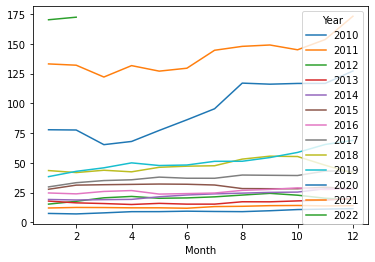

In [48]:
pd.pivot_table(df[df['Year']>=2010], index='Month', columns='Year', values='Open', aggfunc=np.mean).plot();

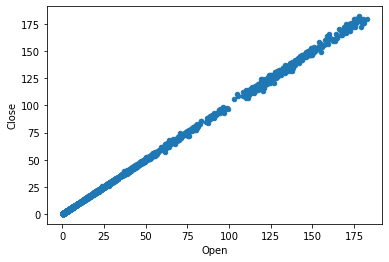

In [49]:
df.plot.scatter(x='Open', y='Close');

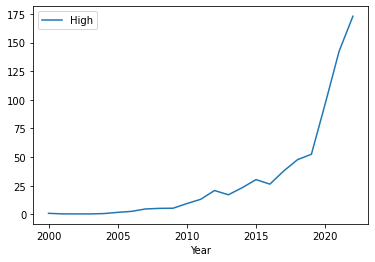

In [50]:
df.groupby('Year').mean().plot(y='High');

### Merge & Join

In [51]:
df_left = pd.DataFrame({'key_left': ['k1', 'k2', 'k3', 'k4', 'k5'], 'value': [1, 2, 3, 4, 5]})
df_right = pd.DataFrame({'key_right': ['k1', 'k2', 'k6', 'k4', 'k5'], 'value': [6, 7, 8, 9, 10]})

`merge` allows us to join DataFrames by specifying an arbitrary column on each of them

In [52]:
df_left.merge(df_right, left_on='key_left', right_on='key_right', how='outer')

,key_left,value_x,key_right,value_y
0,k1,1.0,k1,6.0
1,k2,2.0,k2,7.0
2,k3,3.0,NaN,NaN
3,k4,4.0,k4,9.0
4,k5,5.0,k5,10.0
5,NaN,NaN,k6,8.0


On the other hand, join performs the join using the respective indices

In [53]:
df_left

,key_left,value
0,k1,1
1,k2,2
2,k3,3
3,k4,4
4,k5,5


In [54]:
df_right

,key_right,value
0,k1,6
1,k2,7
2,k6,8
3,k4,9
4,k5,10


In [55]:
df_left.set_index('key_left', inplace=True)
df_right.set_index('key_right', inplace=True)

In [56]:
df_left

,value
key_left,
k1,1
k2,2
k3,3
k4,4
k5,5


In [57]:
df_right

,value
key_right,
k1,6
k2,7
k6,8
k4,9
k5,10


In [58]:
df_left.join(df_right, lsuffix='_l', rsuffix='_r', how='inner')

,value_l,value_r
k1,1,6
k2,2,7
k4,4,9
k5,5,10
